# Лабораторная работа 3. Полиномиальная регрессия. Регуляризация

### Задание 1. Полиномиальная регрессия

Загрузите данные из файлов `ml_lab1_train.txt` и `ml_lab1_test.txt` (первая лабораторная работа).

Для $k = 1,2,3,\ldots,10$ найдите полином ${f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость.

Выведите коэффициенты полиномов и нарисуйте их графики на одном чертеже вместе с точками данных $(x_i, y_i)$ (возможно, чертеж стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Для каждого из полиномов найдите среднеквадратическую ошибку $MSE$ и коэффициент детерминации $R^2$ на обучающих данных и на тестовых данных. Постройте графики зависимости $MSE$ на обучающих и тестовых данных в зависимости от степени полинома (должно быть три графика: один для обучающих данных, второй – для тестовых, третий – для обоих видов данных вместе).

Сделайте вывод, что происходит с ошибкой на обучающих и тестовых данных с увеличением степени полинома.

In [68]:
import numpy as np

# def fit_polynomial(x, y, degree):
# # Создание матрицы Вандермонда
#     X = np.column_stack([x**i for i in range(degree )])
#     coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
#     return sorted(coefficients) 

train_data = np.loadtxt('../ml_lab1/ml_lab1_train.txt', delimiter=',')
test_data = np.loadtxt('../ml_lab1/ml_lab1_test.txt', delimiter=',')

x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

# print((fit_polynomial(x_train, y_train, 4)))

# def polynomial_features(x, degree):
#     # Создание матрицы признаков для полиномиальной регрессии
#     X_poly = np.column_stack([x**i for i in range(1, degree+1)])
#     return X_poly

# def fit_polynomial(x, y, degree):
#     # Добавление столбца с единицами для свободного члена
#     X_poly = polynomial_features(x, degree)
#     X_poly = np.column_stack([np.ones_like(x)] + [X_poly])
    
#     # Нахождение коэффициентов с использованием нормального уравнения
#     theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
#     return theta

# def predict_polynomial(x, theta):
#     # Прогнозирование значений с использованием обученных коэффициентов
#     X_poly = polynomial_features(x, len(theta)-1)
#     X_poly = np.column_stack([np.ones_like(x)] + [X_poly])
    
#     y_pred = X_poly @ theta
    
#     return y_pred

# # Обучение и вывод коэффициентов для полиномов различных степеней
# degrees = np.arange(1, 11)
# for degree in degrees:
#     theta = fit_polynomial(x_train, y_train, degree)
#     print(f'Degree {degree} Coefficients: {theta}')

# print("Predicting polynomial", fit_polynomial_regression(x_train, y_train, 4))


def polynomial_regression(X, Y, degree):
    # Создаем матрицу системы уравнений
    X_matrix = np.vander(X, degree + 1)
    
    # Решаем систему уравнений методом наименьших квадратов
    coefficients = np.linalg.lstsq(X_matrix, Y, rcond=None)[0]
    
    return coefficients
print((polynomial_regression(x_train, y_train, 1)))


[2.2791345  4.43323091]


coefficients: [2.2791345  4.43323091]
Степень 1:
MSE (Train): 0.29689663326251964, R^2 (Train): 0.6978349896117896
MSE (Test): 0.43512020040488864, R^2 (Test): 0.6848801332179664



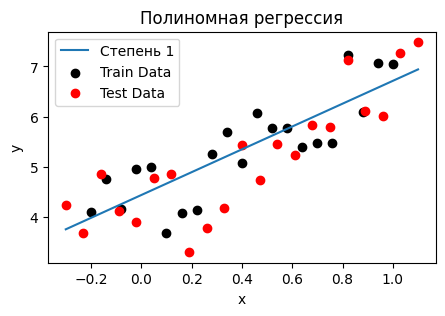

coefficients: [1.40162851 1.15783169 4.4724765 ]
Степень 2:
MSE (Train): 0.26969891587669137, R^2 (Train): 0.7255153255796205
MSE (Test): 0.3564762887831228, R^2 (Test): 0.7418351055001277



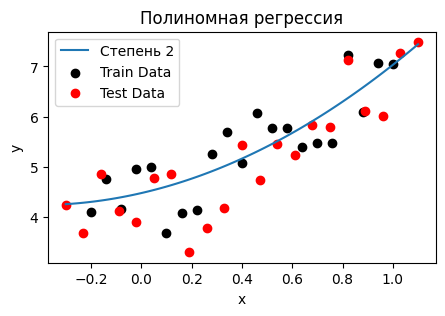

coefficients: [-0.3817686   1.85975084  1.06501611  4.46073636]
Степень 3:
MSE (Train): 0.269497187147961, R^2 (Train): 0.7257206339482019
MSE (Test): 0.35534645715184265, R^2 (Test): 0.7426533446735878



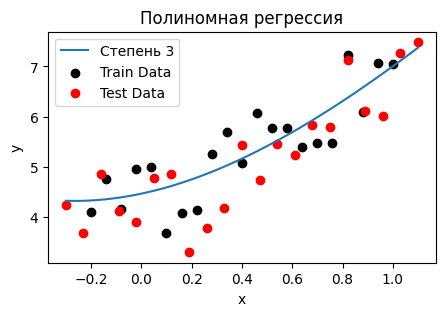

coefficients: [  7.9184747  -13.05132812   6.79409178   1.17180239   4.34116612]
Степень 4:
MSE (Train): 0.2610665330579276, R^2 (Train): 0.7343008884721454
MSE (Test): 0.4417270189283705, R^2 (Test): 0.6800953869087043



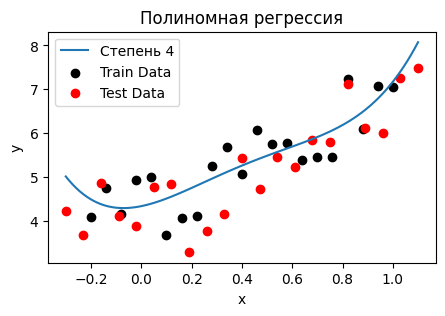

coefficients: [ 29.52497804 -51.13148139  21.37479628   3.2747144   -0.13059804
   4.43129781]
Степень 5:
MSE (Train): 0.2499850464831753, R^2 (Train): 0.7455790140244014
MSE (Test): 0.5579732021691416, R^2 (Test): 0.5959083467697605



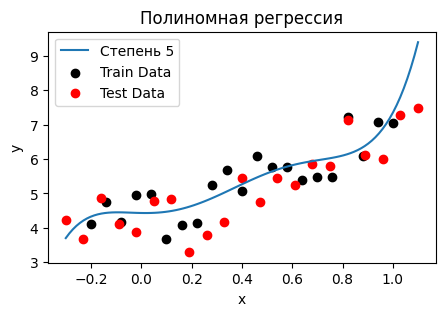

coefficients: [-229.97013345  581.45329832 -481.51013295  121.25709715   16.00290399
   -4.59717933    4.38379501]
Степень 6:
MSE (Train): 0.18829348988370537, R^2 (Train): 0.8083652761517361
MSE (Test): 2.5816929336974086, R^2 (Test): -0.8696965403624699



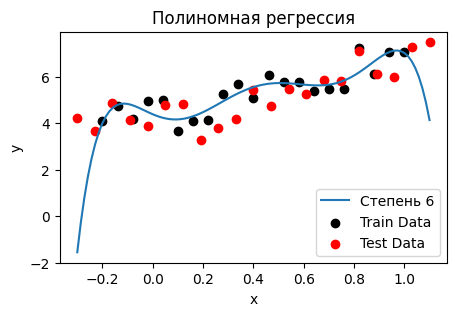

coefficients: [-167.38196464  238.69936753  122.87821736 -314.2311726   119.35078428
    7.21545861   -4.00889591    4.44451271]
Степень 7:
MSE (Train): 0.18539621153294408, R^2 (Train): 0.8113139661834659
MSE (Test): 2.5157829032609156, R^2 (Test): -0.8219636150893594



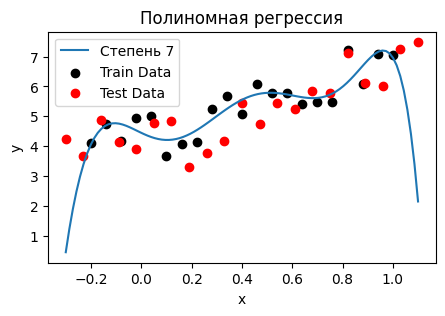

coefficients: [ 1.72947756e+03 -5.70171017e+03  6.76062844e+03 -3.13285638e+03
  1.09895667e+02  2.68860439e+02 -2.66956310e+01 -5.18277352e+00
  4.66378911e+00]
Степень 8:
MSE (Train): 0.15905556579089863, R^2 (Train): 0.8381220219260168
MSE (Test): 4.357288520751419, R^2 (Test): -2.155606604594322



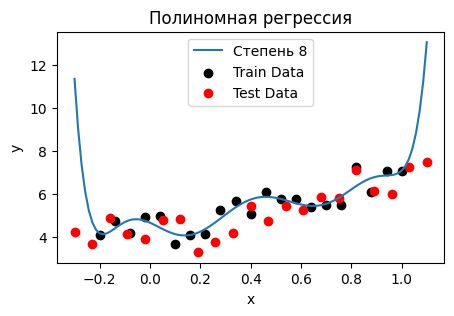

coefficients: [  903.2155163  -1522.098294   -1216.4481783   3913.26809304
 -2441.96268938   176.24541113   219.04203752   -24.26271676
    -4.55270582     4.6458836 ]
Степень 9:
MSE (Train): 0.15847184274697287, R^2 (Train): 0.8387161030299131
MSE (Test): 4.7763422785147975, R^2 (Test): -2.4590909388036484



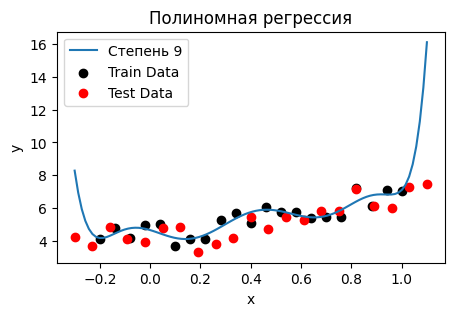

coefficients: [-9.81857952e+03  4.01775336e+04 -6.36209964e+04  4.66866443e+04
 -1.29699271e+04 -1.66082643e+03  1.20195282e+03  4.49356056e+01
 -3.61753889e+01 -2.15983331e+00  4.66917252e+00]
Степень 10:
MSE (Train): 0.1531661099415124, R^2 (Train): 0.8441159851055763
MSE (Test): 14.632427977128495, R^2 (Test): -9.596999979683378



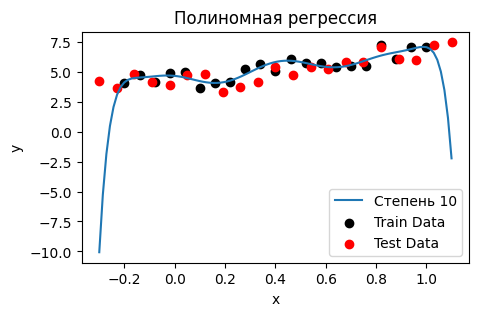

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

train_data = np.loadtxt('../ml_lab1/ml_lab1_train.txt', delimiter=',')
test_data = np.loadtxt('../ml_lab1/ml_lab1_test.txt', delimiter=',')

x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

# Создание функции для вычисления полинома степени k
def poly_fit(x, y, k):
    return np.polyfit(x, y, k)

degrees = range(1, 11)

mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []



for k in degrees:
    plt.figure(figsize=(5, 3))

    # Вычисление коэффициентов полинома
    coefficients = poly_fit(x_train, y_train, k)
    
    print("coefficients:", coefficients)

    # Получение значений полинома на обучающих и тестовых данных
    y_train_pred = np.polyval(coefficients, x_train)
    y_test_pred = np.polyval(coefficients, x_test)
    y_pred = np.polyval(coefficients, x_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    print(f'Степень {k}:')
    print(f'MSE (Train): {mse_train}, R^2 (Train): {r2_train}')
    print(f'MSE (Test): {mse_test}, R^2 (Test): {r2_test}')
    print()
    x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
    y_range = np.polyval(coefficients, x_range)
    plt.plot(x_range, y_range, label=f'Степень {k}')
    # plt.plot(x_test, y_pred, label=f'Степень {k}')
    plt.scatter(x_train, y_train, label='Train Data', color='black')
    plt.scatter(x_test, y_test, label='Test Data', color='red')

    plt.title('Полиномная регрессия')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()



In [39]:
import numpy as np
from scipy.linalg import lstsq

def fit_polynomial(x, y, degree):
# Создание матрицы Вандермонда
    X = np.column_stack([x**i for i in range(degree )])
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients 
print(fit_polynomial(x_train, y_train, 2 ))

[4.43323091 2.2791345 ]


[0.29689663326251964, 0.26969891587669137, 0.269497187147961, 0.2610665330579276, 0.2499850464831753, 0.18829348988370537, 0.18539621153294408, 0.15905556579089863, 0.15847184274697287, 0.1531661099415124]

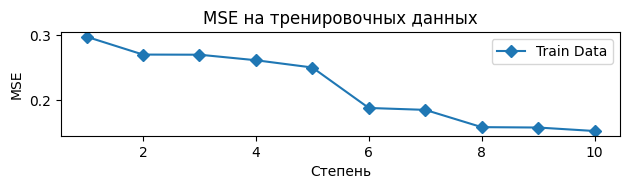

In [40]:
print(mse_train_list)
plt.subplot(3, 1, 1)
plt.plot(degrees, mse_train_list, marker='D', label='Train Data')
plt.title('MSE на тренировочных данных')
plt.xlabel('Степень')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

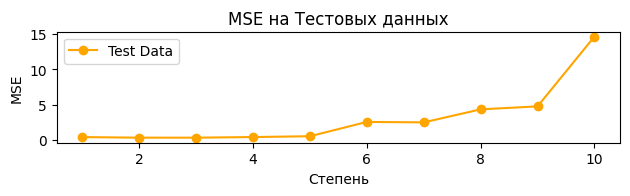

In [41]:
plt.subplot(3, 1, 2)
plt.plot(degrees, mse_test_list, marker='o', color='orange', label='Test Data')
plt.title('MSE на Тестовых данных')
plt.xlabel('Степень')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

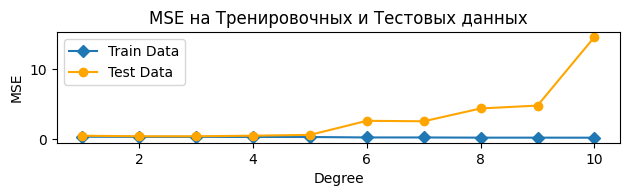

In [42]:
plt.subplot(3, 1, 3)
plt.plot(degrees, mse_train_list, marker='D', label='Train Data')
plt.plot(degrees, mse_test_list, marker='o', color='orange', label='Test Data')
plt.title('MSE на Тренировочных и Тестовых данных')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

### Задание 2. Регуляризация

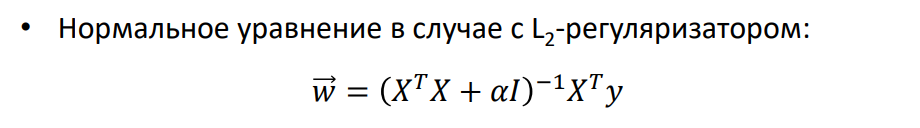

Вспомним, что задачу линейной регрессии (нахождение вектора коэффициентов $\overrightarrow{w}_{opt}$) можно решить при помощи нормального уравнения:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Если строки или столбцы матрицы $X$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не может быть решена с помощью нормального уравнения (придется использовать, например, градиентный спуск). На практике различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место *переобучение* (overfitting). Один из симптомов этой проблемы – необычно большие по модулю компоненты вектора $\overrightarrow{w}_{opt}$.

Один из способов борьбы с переобучением – **регуляризация**. Сейчас мы рассмотрим одну из её разновидностей – **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \alpha I)$, где $\alpha$ – параметр регуляризации, $I$ – единичная матрица. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение:

$$\overrightarrow{w}_{opt} = (X^TX + \alpha I)^{-1}X^T\overrightarrow{y}$$

и снижаем эффект переобучения. Параметр $\alpha$ нужно подбирать, и каких-то универсальных способов это сделать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации полиномом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным параметром $\alpha$, ошибку на тестовой выборке можно сделать не больше, чем для полинома оптимальной степени в модели без регуляризации. Для этого $\alpha$ сравните $\det(X^TX)$ и $\det(X^TX + \alpha I)$.

Изобразите на графике три полинома: полином оптимальной степени без регуляризации, полином шестой степени без регуляризации и полином шестой степени с регуляризацией.

In [43]:
from sklearn.preprocessing import PolynomialFeatures



In [44]:
data_train = np.loadtxt('../ml_lab1/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../ml_lab1/ml_lab1_test.txt', delimiter=',')

X_train = data_train[:,: -1]
y_train = data_train[:, 1]

X_test = data_test[:,: -1]
y_test = data_test[:, 1]

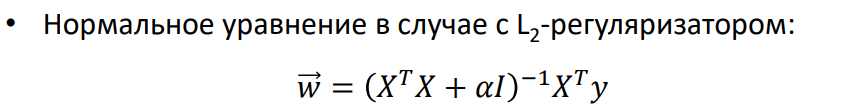

In [45]:
def get_weight_l2(X,y, alpha):

    X_resh = np.c_[np.ones((X.shape[0], 1)), X]
    X_w0 = np.hstack((np.ones((X_resh.shape[0], 1)), X_resh))
    X_transp = np.transpose(X_w0)
    # print(X_transp)

    weight =  np.linalg.inv( X_transp.dot(X_w0) + alpha * np.identity(X_w0.shape[1])).dot(X_transp).dot(y)
    return weight

In [46]:
def l2_regularized_weights(X, y, alpha):
    # Добавляем столбец единиц для учёта свободного члена
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Вычисляем матрицу Грама
    XTX = np.dot(X.T, X)
    detXTX = np.linalg.det(XTX)
    
    # Вычисляем регуляризацию
    regularization = alpha * np.eye(XTX.shape[0])
    det2 = np.linalg.det(XTX + regularization)
    # Вычисляем веса с помощью формулы (X^T*X + λI)^(-1) * X^T * y
    weights = np.dot(np.linalg.inv(XTX + regularization), np.dot(X.T, y))
    
    return weights, detXTX , det2

def predict(X, weights):
    return np.hstack((np.ones((X.shape[0], 1)), X)).dot(weights)

In [47]:
# def reshape_X(X):
#     return X if X.ndim > 1 else np.swapaxes([X], 0, 1)
# def get_weight_l22(X, y, alpha):
#     X_reshaped = reshape_X(X)
#     X_w0 = np.hstack((np.ones((X_reshaped.shape[0], 1)), X_reshaped))
#     X_transposed = np.transpose(X_w0)
#     print()
#     # print("test", np.linalg.inv(X_transposed.dot(X_w0) + alpha * np.identity(X_w0.shape[1])).dot(X_transposed).dot(y))
#     return np.linalg.inv(X_transposed.dot(X_w0) + alpha * np.identity(X_w0.shape[1])).dot(X_transposed).dot(y)


# def polynomial_regression_l22(X, y, polynomial_degree, alpha):
#     return get_weight_l2(
#         PolynomialFeatures(polynomial_degree, include_bias=False).fit_transform(reshape_X(X)), 
#         y,
#         alpha
#     )


In [48]:
alphas = ([ 0.01, 0.1, 1, 10, 100])

for alpha in alphas:
    degree = 6
    weight_l2, _, _ = l2_regularized_weights(X_train, y_train, alpha)
    _, detXTX, _ = l2_regularized_weights(X_train, y_train, alpha)
    _, _, det_alphaI = l2_regularized_weights(X_train, y_train, alpha)
    print("alpha =", alpha)
    print(f"detXT*X = {detXTX:.4f}" )
    print(f"detXT*X + alpha*I = {det_alphaI:.4f}")
    y_pred_l2 = predict(X_train, weight_l2)
    # print(y_pred)
    mse_l2 = mean_squared_error(y_train, y_pred_l2)
    print(f"MSE L2 = {mse_l2:.4}")
    print()

def best_alpha(alpha):
    # degree = 6
    weight_l2, _, _ = l2_regularized_weights(X_train, y_train, alpha)
    _, detXTX, _ = l2_regularized_weights(X_train, y_train, alpha)
    _, _, det_alphaI = l2_regularized_weights(X_train, y_train, alpha)
    print("alpha =", alpha)
    print(f"detXT*X = {detXTX:.4f}" )
    print(f"detXT*X + alpha*I = {det_alphaI:.4f}")
    y_pred_l2 = predict(X_train, weight_l2)
    # print(y_pred)
    mse_l2 = mean_squared_error(y_train, y_pred_l2)
    print(f"MSE L2 = {mse_l2:.4}")
    print()
    return weight_l2, y_pred_l2


alpha = 0.01
detXT*X = 58.2120
detXT*X + alpha*I = 58.4834
MSE L2 = 0.2969

alpha = 0.1
detXT*X = 58.2120
detXT*X + alpha*I = 60.9352
MSE L2 = 0.2974

alpha = 1
detXT*X = 58.2120
detXT*X + alpha*I = 86.3440
MSE L2 = 0.3416

alpha = 10
detXT*X = 58.2120
detXT*X + alpha*I = 429.5320
MSE L2 = 2.719

alpha = 100
detXT*X = 58.2120
detXT*X + alpha*I = 12771.4120
MSE L2 = 19.09



In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score

# train_data = np.loadtxt('../ml_lab1/ml_lab1_train.txt', delimiter=',')
# test_data = np.loadtxt('../ml_lab1/ml_lab1_test.txt', delimiter=',')

# x_train, y_train = train_data[:, 0], train_data[:, 1]
# x_test, y_test = test_data[:, 0], test_data[:, 1]

# # Создание функции для вычисления полинома степени k
# def poly_fit(x, y, k):
#     return np.polyfit(x, y, k)

# degrees = range(1, 11)

# mse_train_list = []
# mse_test_list = []
# r2_train_list = []
# r2_test_list = []



# for k in degrees:
#      if k == 6:
#         # plt.figure(figsize=(5, 3))
#         # print(x_train)
#         # print()

#         # Вычисление коэффициентов полинома
#         coefficients = poly_fit(x_train, y_train, k)
#         # print("coefficients:", coefficients)
    
#         print("coefficients", coefficients)
#         # Получение значений полинома на обучающих и тестовых данных
#         y_train_pred = np.polyval(coefficients, x_train)
#         y_test_pred = np.polyval(coefficients, x_test)
#         y_pred = np.polyval(coefficients, x_test)

#         # mse_train = mean_squared_error(y_train, y_train_pred)
#         # mse_test = mean_squared_error(y_test, y_test_pred)
#         # r2_train = r2_score(y_train, y_train_pred)
#         # r2_test = r2_score(y_test, y_test_pred)

#         # mse_train_list.append(mse_train)
#         # mse_test_list.append(mse_test)
#         # r2_train_list.append(r2_train)
#         # r2_test_list.append(r2_test)

#         # print(f'Степень {k}:')
#         # print(f'MSE (Train): {mse_train}, R^2 (Train): {r2_train}')
#         # print(f'MSE (Test): {mse_test}, R^2 (Test): {r2_test}')
#         # print()
#         x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
#         y_range = np.polyval(coefficients, x_range)
#         plt.plot(x_range, y_range, label=f'Степень {k}')
#         # plt.plot(x_test, y_pred, label=f'Степень {k}')
#         plt.scatter(x_train, y_train, label='Train Data', color='black')
#         plt.scatter(x_test, y_test, label='Test Data', color='red')

#         plt.title('Полиномная регрессия')
#         plt.xlabel('x')
#         plt.ylabel('y')
#         plt.legend()
#         plt.show()



In [50]:

# def poly_fit(x, y, k):
#     return np.polyfit(x, y, k)

# degrees = range(6, 7)

# alpha = 1

# _, y_pred_l2 = best_alpha(alpha)
# # print(X_train.flatten())
# X_train_one_dim = X_train.flatten()
# # X_test = X_test.flatten()

# # plt.figure(figsize=(5, 3))

# # Вычисление коэффициентов полинома

# coefficients = np.polyfit(X_train_one_dim, y_pred_l2, 5)
# print(coefficients)

# # Получение значений полинома на обучающих и тестовых данных
# y_train_pred = np.polyval(coefficients, X_train_one_dim)
# y_test_pred = np.polyval(coefficients, X_test)
# y_pred = np.polyval(coefficients, X_test)

# # mse_train = mean_squared_error(y_train, y_train_pred)
# # mse_test = mean_squared_error(y_test, y_test_pred)
# # r2_train = r2_score(y_train, y_train_pred)
# # r2_test = r2_score(y_test, y_test_pred)

# # print(f'Степень {6}:')
# # print(f'MSE (Train): {mse_train}, R^2 (Train): {r2_train}')
# # print(f'MSE (Test): {mse_test}, R^2 (Test): {r2_test}')
# # print()
# x_range = np.linspace(np.min(X_test), np.max(X_test), 100)
# y_range = np.polyval(coefficients, x_range)
# plt.plot(x_range, y_range, label=f'Степень {6}')
# # plt.plot(x_test, y_pred, label=f'Степень {k}')
# plt.scatter(X_train_one_dim, y_train, label='Train Data', color='black')
# plt.scatter(X_test, y_test, label='Test Data', color='red')

# plt.title('Полиномная регрессия')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()



alpha = 0.12
detXT*X = 58.2120
detXT*X + alpha*I = 61.4822
MSE L2 = 0.2976



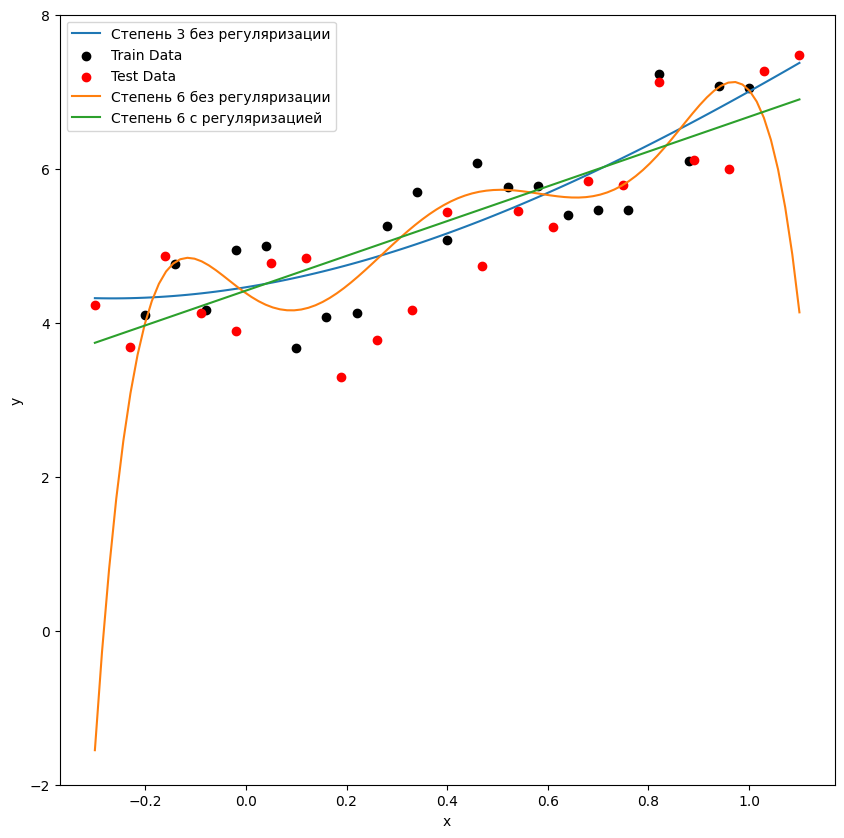

In [51]:
def poly_fit(x, y, k):
    return np.polyfit(x, y, k)

alpha = 0.12
_, y_pred_l2 = best_alpha(alpha)
X_train_one_dim = X_train.flatten()
plt.figure(figsize=(10,10))

# полином 3 без регуляризации
coefficients = poly_fit(X_train_one_dim, y_train, 3)
x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
y_range = np.polyval(coefficients, x_range)
plt.plot(x_range, y_range, label=f'Степень {3} без регуляризации')
plt.scatter(X_train_one_dim, y_train, label='Train Data', color='black')
plt.scatter(x_test, y_test, label='Test Data', color='red')

# полином 6 без регуляризации

coefficients = poly_fit(X_train_one_dim, y_train, 6)
x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
y_range = np.polyval(coefficients, x_range)
plt.plot(x_range, y_range, label=f'Степень {6} без регуляризации')

# полином 6 с регуляризацией

coefficients = np.polyfit(X_train.flatten(), y_pred_l2, 6)
x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
y_range = np.polyval(coefficients, x_range)
plt.plot(x_range, y_range, label=f'Степень {6} с регуляризацией')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-2, 8)

plt.show()

In [52]:
# alpha = 1

# _, y_pred_l2 = best_alpha(alpha)

# X_train_one_dim = X_train.flatten()


# coefficients = poly_fit(X_train_one_dim, y_train, 3)

# print("coefficients", coefficients)
# # Получение значений полинома на обучающих и тестовых данных
# y_train_pred = np.polyval(coefficients, X_train_one_dim)
# y_test_pred = np.polyval(coefficients, x_test)
# y_pred = np.polyval(coefficients, x_test)

  
# x_range = np.linspace(np.min(x_test), np.max(x_test), 100)
# y_range = np.polyval(coefficients, x_range)
# plt.plot(x_range, y_range, label=f'Степень {}')
# plt.scatter(X_train_one_dim, y_train, label='Train Data', color='black')
# plt.scatter(x_test, y_test, label='Test Data', color='red')

# plt.title('Полиномная регрессия оптимальной степени (3) без регуляризации')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

### Задание 3. Линейная регрессия в scikit-learn

Скачайте файлы ``flats_moscow.txt`` и ``flats_moscow_description.pdf``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью линейной регрессии зависимость между ценой квартиры и остальными доступными параметрами.

Построив несколько моделей, нужно сравнить их качество. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с полиномами: как хорошо падала ошибка на обучающей выборке с ростом степени и как быстро росла ошибка на тестовых данных!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели набора данных упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

Постройте следующие модели линейной регрессии по методу наименьших квадратов:

1. на основе собственной функции (нормальное уравнение);

1. с L2-регуляризацией на основе собственной функции – параметр регуляризации нужно подобрать;

1. собственную реализацию полиномиальной регрессии – степень полинома нужно подобрать;

1. на основе функции `LinearRegression` из `scikit-learn`;

1. с L2-регуляризацией на основе функции `Ridge` из `scikit-learn` – параметр регуляризации нужно подобрать;

1. с L1-регуляризацией на основе функции `Lasso` из `scikit-learn` – параметр регуляризации нужно подобрать.

Выведите и сравните регрессионные коэффициенты для всех функций. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество решения задачи, выведя среднеквадратическую ошибку на обучающих и тестовых данных для всех функций. Эти ошибки лучше свести в таблицу (например, используя `pandas.DataFrame`).

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("flats_moscow.txt", delimiter='\t')

# print(data.head())

X = data.drop('price', axis=1) 
y = data['price']
# print()
# print(y.head())  

# print()
# print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



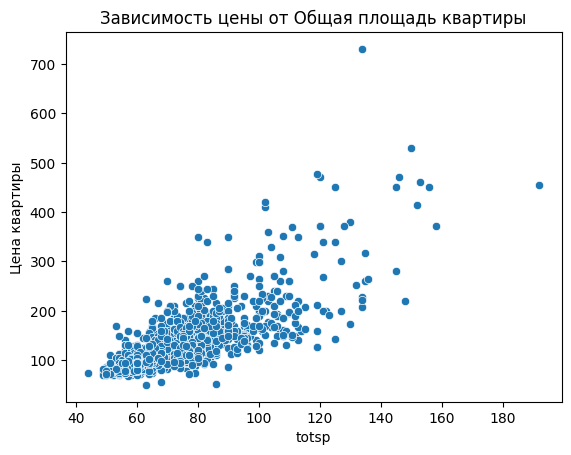

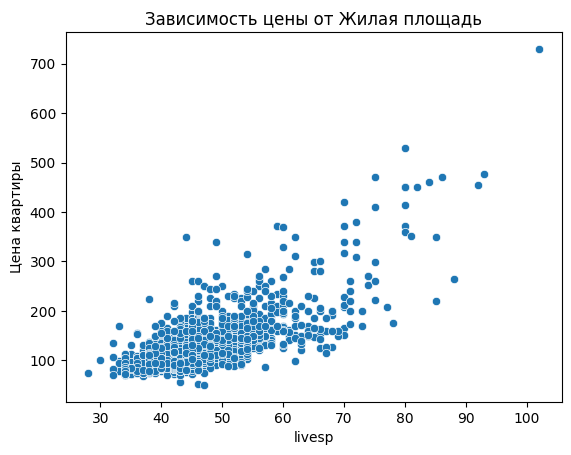

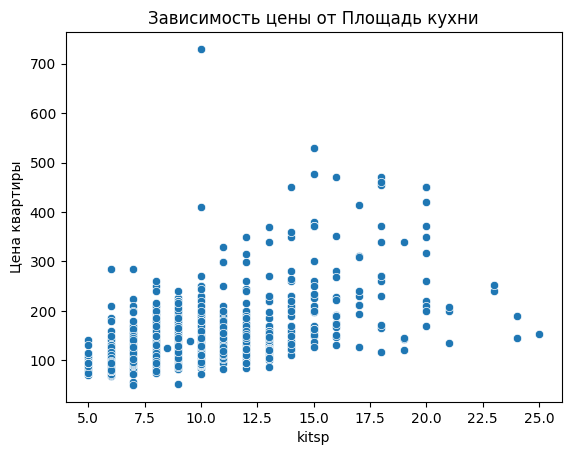

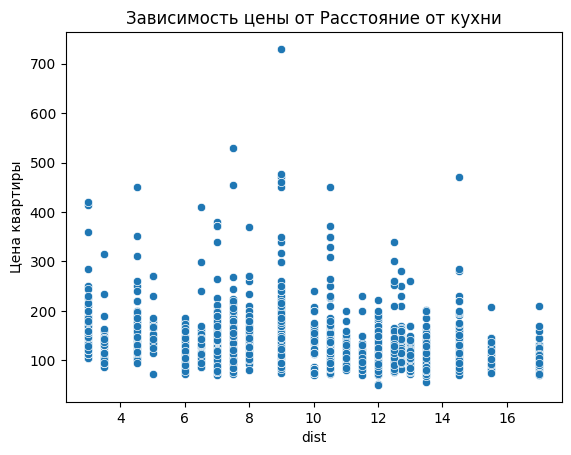

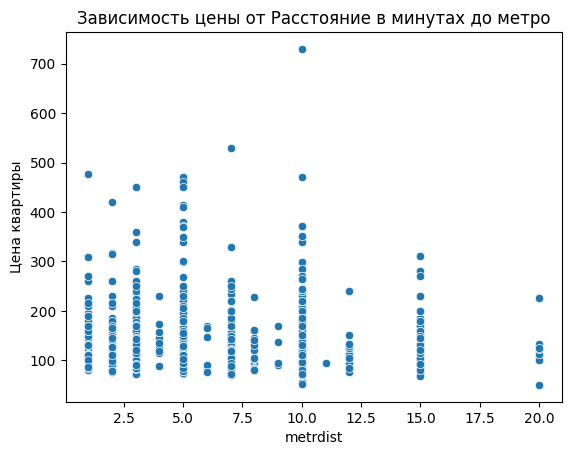

In [54]:
import seaborn as sns
features = ["totsp", "livesp", "kitsp", "dist", "metrdist"]
index = 0
for feature in features:

    # plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y="price")
    new_features = ["Общая площадь квартиры", "Жилая площадь", "Площадь кухни", "Расстояние от кухни", "Расстояние в минутах до метро"] 
    plt.title(f"Зависимость цены от {new_features[index]}")
    plt.xlabel(feature)
    plt.ylabel("Цена квартиры")
    plt.show()
    index+=1

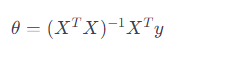

In [55]:

# Добавляем столбец с единицами
X = np.column_stack((np.ones(len(data)), data.drop('price', axis=1)))

# Целевая переменная
y = data['price'].values

# Решение нормального уравнения
weight = np.linalg.inv(X.T @ X) @ X.T @ y

print('Веса:', weight)

# Предсказание для новых данных 
new_totsp = 90
new_livesp = 65
new_kitsp = 10
new_dist = 15
new_metrdist = 10

X_new = np.array([1, new_totsp, new_livesp, new_kitsp, new_dist, new_metrdist])
predicted_price = X_new @ weight
print('Предсказанная цена:', predicted_price)

Веса: [-26.78926963   1.48705289   1.656289     1.81920498  -3.32715406
  -1.3156886 ]
Предсказанная цена: 169.83212810851026


In [56]:
# Нормальное уравнение

y_train_pred = np.column_stack((np.ones(len(X_train)), X_train)) @ weight

# Предсказания на тестовом наборе
y_test_pred = np.column_stack((np.ones(len(X_test)), X_test)) @ weight
print(type(y_train))
print(y_train_pred)

# Вычисление MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE на обучающем наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

<class 'pandas.core.series.Series'>
[153.60433131 143.38645549  91.30494936 ...  72.03780187 129.8940271
 155.81464216]
MSE на обучающем наборе: 885.2019552357654
MSE на тестовом наборе: 1014.5587818112065


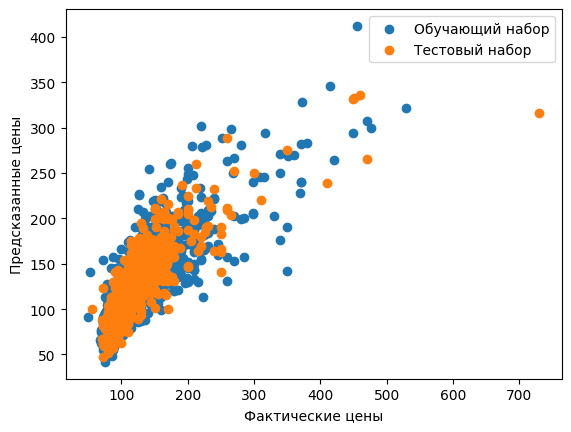

In [57]:
plt.scatter(y_train, y_train_pred, label='Обучающий набор')
plt.scatter(y_test, y_test_pred, label='Тестовый набор')
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанные цены')
plt.legend()
plt.show()

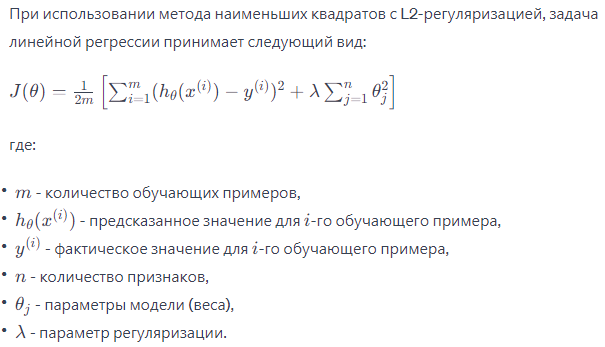

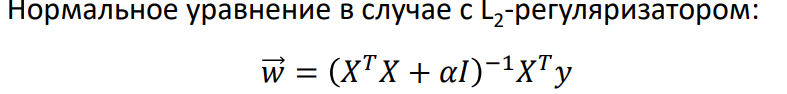

In [58]:
# L2 регуляризатор
def ridge_regression(X, y, lambda_reg):
    # Добавляем столбец с единицами для свободного члена
    Xw0 = np.column_stack((np.ones(len(X)), X))
    I = np.eye(Xw0.shape[1])

    # L[0, 0] = 0  # Не применяем регуляризацию к свободному члену (спросить про это)
    
    weight = np.linalg.inv(Xw0.T @ Xw0 + lambda_reg * I) @ Xw0.T @ y
    
    return weight

lambda_reg = 0.1
# weight = ridge_regression(X_train, y_train, lambda_reg)

print(ridge_regression(X_train, y_train, lambda_reg))


[-12.91787662   1.42666605   1.3761478    2.49053575  -3.48558545
  -1.34350309]


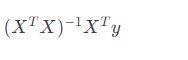

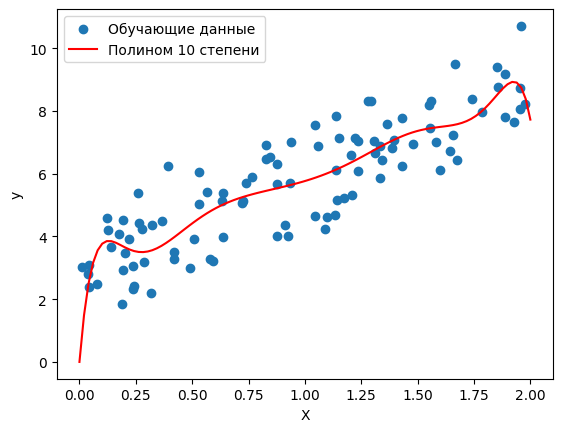

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_features(X, degree):
    # """Генерация полиномиальных признаков."""
    X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
    return X_poly

def fit_polynomial_regression(X, y, degree):
    # """Построение модели полиномиальной регрессии."""
    X_poly = polynomial_features(X, degree)
    
    # Решение нормального уравнения для полиномиальной регрессии
    weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    return weights

def predict_polynomial(X, weights, degree):
    # """Предсказание с использованием модели полиномиальной регрессии."""
    X_poly = polynomial_features(X, degree)
    predictions = X_poly @ weights
    return predictions

# Пример использования
# Генерация случайных данных
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Степень полинома
degree = 10

# Обучение модели
weights = fit_polynomial_regression(X, y, degree)

# Предсказание для новых данных
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = predict_polynomial(X_new, weights, degree)

# Визуализация
plt.scatter(X, y, label='Обучающие данные')
plt.plot(X_new, y_pred, 'r-', label=f'Полином {degree} степени')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки (не менее трёх), являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

In [60]:
# Ваш код здесь